Week 6 · Day 2 — Regularization (Dropout, Weight Decay)
Why this matters

Neural nets easily overfit (memorize training data). Regularization techniques reduce overfitting so models generalize better to unseen data.

Theory Essentials

Overfitting: training loss ↓, validation loss ↑.

Dropout: randomly zeroes activations during training (forces redundancy).

Example: Dropout(0.5) → each neuron “off” with 50% chance.

Weight Decay (L2 regularization): penalizes large weights, encouraging simpler models.

Implemented via optimizer parameter weight_decay.

Both methods improve generalization, often used together.

Trade-off: too much regularization = underfitting.

**Dropout** → During training, randomly sets a fraction of neuron outputs to 0 (e.g., 50%). This prevents the network from relying too much on specific neurons, forcing it to learn more robust features. At test time, dropout is off, and the full network is used. → *Helps reduce overfitting by adding randomness and improving generalization.*

**Weight Decay** → Adds an L2 penalty to the loss that discourages large weights. In practice, each update slightly shrinks weights toward zero. This keeps the model simpler, prevents weights from growing uncontrollably, and improves generalization. → *Acts like a “brake” to control model complexity and reduce overfitting.*


Model with No Dropout
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Mdoel with dropout
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Mdoel with dropout and weight decay
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4


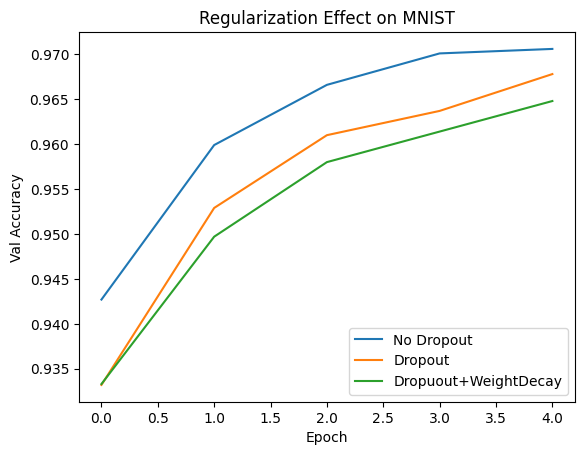

In [1]:
# Setup
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

torch.manual_seed(42)

# ---------- Data ----------
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_data, val_data = random_split(dataset, [50000, 10000])
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=1000)

# ---------- Models ----------
class NetNoDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

class NetWithDropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.drop1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.drop2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.drop1(x)
        x = self.relu(self.fc2(x))
        x = self.drop2(x)
        return self.fc3(x)

# ---------- Train & Eval ----------
def train_eval(model, optimizer, epochs=5):
    criterion = nn.CrossEntropyLoss()
    train_losses, val_losses, val_accs = [], [], []
    for epoch in range(epochs):
        # Train
        model.train()
        total_loss=0
        for X,y in train_loader:
            optimizer.zero_grad()
            out = model(X)
            loss = criterion(out,y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss/len(train_loader))
        print("Epoch:", epoch + 1)

        # Validation
        model.eval()
        correct,total,vloss=0,0,0
        with torch.no_grad():
            for X,y in val_loader:
                out = model(X)
                vloss += criterion(out,y).item()
                preds = out.argmax(1)
                correct += (preds==y).sum().item()
                total += y.size(0)
        val_losses.append(vloss/len(val_loader))
        val_accs.append(correct/total)
    return train_losses, val_losses, val_accs

# Run with and without dropout
print("Model with No Dropout")
model1 = NetNoDropout()
opt1 = optim.Adam(model1.parameters(), lr=0.001, weight_decay=0.0)
losses1, vloss1, vacc1 = train_eval(model1, opt1)

print("Mdoel with dropout")
model2 = NetWithDropout()
opt2 = optim.Adam(model2.parameters(), lr=0.001, weight_decay=0.0) 
losses2, vloss2, vacc2 = train_eval(model2, opt2)

print("Mdoel with dropout and weight decay")
model3 = NetWithDropout()
opt3 = optim.Adam(model3.parameters(), lr=0.001, weight_decay=1e-4) # add weight decay
losses3, vloss3, vacc3 = train_eval(model3, opt3)

# ---------- Plot ----------
plt.plot(vacc1,label="No Dropout")
plt.plot(vacc2,label="Dropout")
plt.plot(vacc3, label="Dropuout+WeightDecay")
plt.xlabel("Epoch"); plt.ylabel("Val Accuracy")
plt.legend(); plt.title("Regularization Effect on MNIST")
plt.show()


Exercises

1) Core (10–15 min)
Task: Compare models with no dropout, dropout only, and dropout + weight decay.

On MNIST with a small net and only 5 epochs, you won’t see dropout/weight decay helping — they just slow learning. If you:

Train longer (20–30 epochs),

Use a larger/more expressive network, or

Try a noisier/more complex dataset (e.g., CIFAR-10),

then you’ll likely see dropout/weight decay prevent overfitting and keep val accuracy higher.

2) Practice (10–15 min)
Task: Increase dropout rate to 0.7. What happens to accuracy?

Model with 0.5 dropout
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Mdoel with 0.7 dropout
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4


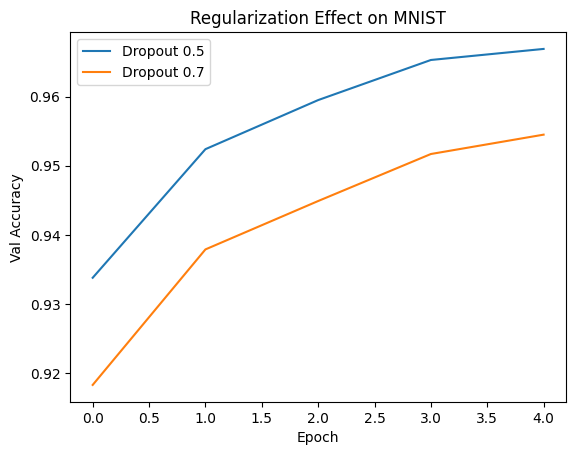

In [ ]:
class NetWithDropout_07(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.drop1 = nn.Dropout(0.7)
        self.fc2 = nn.Linear(256, 128)
        self.drop2 = nn.Dropout(0.7)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.relu(self.fc1(x))
        x = self.drop1(x)
        x = self.relu(self.fc2(x))
        x = self.drop2(x)
        return self.fc3(x)
    

print("Model with 0.5 dropout")
model = NetWithDropout()
opt = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0) 
losses, vloss, vacc = train_eval(model, opt)

print("Mdoel with 0.7 dropout")
model2 = NetWithDropout_07()
opt2 = optim.Adam(model2.parameters(), lr=0.001, weight_decay=0.0) 
losses2, vloss2, vacc2 = train_eval(model2, opt2)

# ---------- Plot ---------
plt.plot(vacc,label="Dropout 0.5")
plt.plot(vacc2,label="Dropout 0.7")
plt.xlabel("Epoch"); plt.ylabel("Val Accuracy")
plt.legend(); plt.title("Regularization Effect on MNIST")
plt.show()

Too much droput leads to underfitting.

3) Stretch (optional, 10–15 min)
Task: Train for 20 epochs. Does dropout+weight decay keep validation accuracy stable while the no-dropout model starts overfitting?

Model with No Dropout
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Mdoel with dropout
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Mdoel with dropout and weight decay
Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19


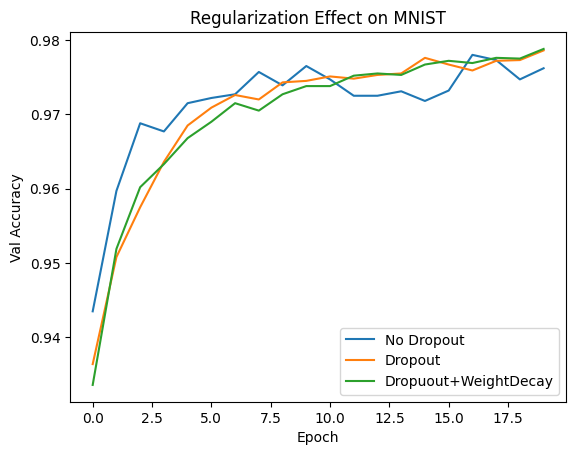

In [5]:

print("Model with No Dropout")
model1 = NetNoDropout()
opt1 = optim.Adam(model1.parameters(), lr=0.001, weight_decay=0.0)
losses1, vloss1, vacc1 = train_eval(model1, opt1, 20)

print("Mdoel with dropout")
model2 = NetWithDropout()
opt2 = optim.Adam(model2.parameters(), lr=0.001, weight_decay=0.0) 
losses2, vloss2, vacc2 = train_eval(model2, opt2, 20)

print("Mdoel with dropout and weight decay")
model3 = NetWithDropout()
opt3 = optim.Adam(model3.parameters(), lr=0.001, weight_decay=1e-4) # add weight decay
losses3, vloss3, vacc3 = train_eval(model3, opt3, 20)

# ---------- Plot ----------
plt.plot(vacc1,label="No Dropout")
plt.plot(vacc2,label="Dropout")
plt.plot(vacc3, label="Dropuout+WeightDecay")
plt.xlabel("Epoch"); plt.ylabel("Val Accuracy")
plt.legend(); plt.title("Regularization Effect on MNIST")
plt.show()

We can now see using more epochs that regularization helps with accuracy.

Mini-Challenge (≤40 min)

Task: Train a model on MNIST with too few training samples (e.g., only 5,000 instead of 50,000).

Train two versions:

No regularization

With dropout (p=0.5) + weight decay (1e-4)

Acceptance Criteria:

Plot validation accuracy for both.

Show confusion matrix for the regularized model.

Write 2–3 lines on how regularization helps when data is scarce.

Model with No Dropout
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Mdoel with dropout and weight decay
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


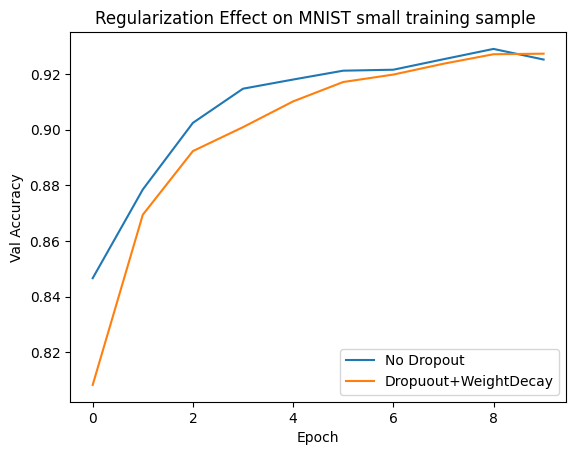

In [7]:
train_data, val_data = random_split(dataset, [5000, 55000])
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=1000)

def train_eval(model, optimizer, epochs=5):
    criterion = nn.CrossEntropyLoss()
    train_losses, val_losses, val_accs = [], [], []
    for epoch in range(epochs):
        # Train
        model.train()
        total_loss=0
        for X,y in train_loader:
            optimizer.zero_grad()
            out = model(X)
            loss = criterion(out,y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        train_losses.append(total_loss/len(train_loader))
        print("Epoch:", epoch + 1)

        # Validation
        model.eval()
        correct,total,vloss=0,0,0
        with torch.no_grad():
            for X,y in val_loader:
                out = model(X)
                vloss += criterion(out,y).item()
                preds = out.argmax(1)
                correct += (preds==y).sum().item()
                total += y.size(0)
        val_losses.append(vloss/len(val_loader))
        val_accs.append(correct/total)
    return train_losses, val_losses, val_accs


print("Model with No Dropout")
model1 = NetNoDropout()
opt1 = optim.Adam(model1.parameters(), lr=0.001, weight_decay=0.0)
losses1, vloss1, vacc1 = train_eval(model1, opt1, 10)

print("Mdoel with dropout and weight decay")
model3 = NetWithDropout()
opt3 = optim.Adam(model3.parameters(), lr=0.001, weight_decay=1e-4) # add weight decay
losses3, vloss3, vacc3 = train_eval(model3, opt3, 10)

# ---------- Plot ----------
plt.plot(vacc1,label="No Dropout")
plt.plot(vacc3, label="Dropuout+WeightDecay")
plt.xlabel("Epoch"); plt.ylabel("Val Accuracy")
plt.legend(); plt.title("Regularization Effect on MNIST small training sample ")
plt.show()

With only 5k training samples, both models cap around ~93% val acc → clear capacity/data limit vs the 97–99% you’d see with 60k.

Dropout+weight decay learns slower early (lower curve in first epochs), then catches up; by epoch 8–9 it’s basically tied.
→ Classic: regularization reduces variance/overfitting but can slow early learning.

If you train longer or use a bigger net, you’ll usually see the unregularized model start to overfit (val plateaus or drops) while the regularized one stays steadier.

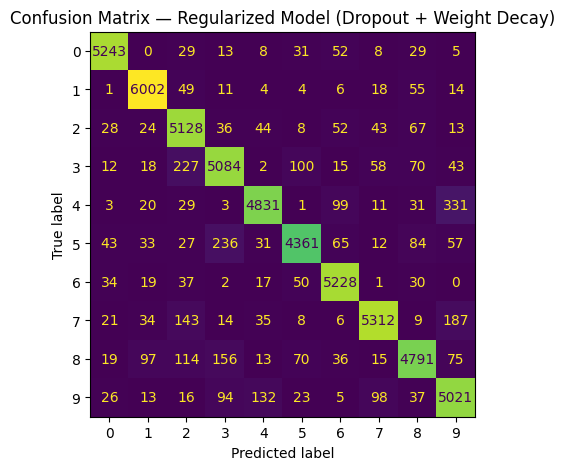

              precision    recall  f1-score   support

           0      0.966     0.968     0.967      5418
           1      0.959     0.974     0.966      6164
           2      0.884     0.942     0.912      5443
           3      0.900     0.903     0.902      5629
           4      0.944     0.901     0.922      5359
           5      0.937     0.881     0.908      4949
           6      0.940     0.965     0.952      5418
           7      0.953     0.921     0.936      5769
           8      0.921     0.890     0.905      5386
           9      0.874     0.919     0.896      5465

    accuracy                          0.927     55000
   macro avg      0.928     0.926     0.927     55000
weighted avg      0.928     0.927     0.927     55000



In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

# --- Gather predictions on validation set ---
model3.eval()
all_preds, all_true = [], []
with torch.no_grad():
    for X, y in val_loader:
        logits = model3(X)
        preds = logits.argmax(1)
        all_preds.append(preds.cpu().numpy())
        all_true.append(y.cpu().numpy())

y_true = np.concatenate(all_true)
y_pred = np.concatenate(all_preds)

# --- Confusion matrix (normalize='true' for per-class rates) ---
cm = confusion_matrix(y_true, y_pred, labels=list(range(10)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, colorbar=False)
plt.title("Confusion Matrix — Regularized Model (Dropout + Weight Decay)")
plt.show()

# Optional: quick per-class precision/recall/F1
print(classification_report(y_true, y_pred, digits=3))


Notes / Key Takeaways

Overfitting = gap between train vs val performance.

Dropout forces networks to not rely on single neurons.

Weight decay shrinks weights, encouraging simpler models.

Combining them is common in deep nets.

Regularization is essential for scaling to large models

Reflection

Why does dropout improve generalization but hurt training accuracy?

Why is weight decay especially useful in large models?



**1. Why does dropout improve generalization but hurt training accuracy?**

* During training, dropout randomly “turns off” neurons → the model can’t rely on any single path.
* This acts like training an ensemble of many smaller networks, which reduces overfitting and improves generalization to unseen data.
* But in training, it *removes useful capacity* temporarily, so the model learns more slowly and training accuracy is lower. At test time dropout is off, and the averaged effect helps performance.

---

**2. Why is weight decay especially useful in large models?**

* Large models have millions of parameters, which makes them prone to memorizing training data.
* Weight decay (L2 regularization) penalizes large weights, pushing the network to find simpler, smoother solutions instead of memorizing.
* This keeps the model stable, reduces overfitting, and improves generalization—especially critical when the model size is big compared to the dataset size.


